In [44]:
import pandas as pd
import numpy as np
import geopandas as gpd
from scipy import stats
import folium, fiona, branca
import seaborn as sbn
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
from datetime import datetime
import mapclassify

In [ ]:
#https://drive.google.com/drive/folders/1DvOfUnktP3d1zksARRPUc-td8vl4h7P6

In [3]:
provincias_gdf = gpd.read_file("../data/ecuador_provincias.gpkg")

In [4]:
provincias_gdf

,OBJECTID,DPA_PROVIN,DPA_DESPRO,DPA_VALOR,DPA_ANIO,REI_CODIGO,REN_CODIGO,PEE_CODIGO,Shape_Leng,Shape_Area,geometry
0,1.0,01,AZUAY,0,2010,05,01,593,6.796516e+05,8.325642e+09,"MULTIPOLYGON (((678190.956 9723881.975, 678231..."
1,2.0,02,BOLIVAR,0,2010,02,01,593,4.530732e+05,3.944871e+09,"MULTIPOLYGON (((710807.591 9872762.982, 710853..."
2,3.0,03,CAÑAR,0,2010,05,01,593,4.020828e+05,3.146684e+09,"MULTIPOLYGON (((708800.896 9751517.241, 708863..."
3,4.0,04,CARCHI,0,2010,04,01,593,4.739416e+05,3.779952e+09,"MULTIPOLYGON (((779010.257 10132276.997, 77891..."
4,5.0,05,COTOPAXI,0,2010,02,01,593,4.433564e+05,6.109122e+09,"MULTIPOLYGON (((730087.931 9962764.026, 730126..."
5,6.0,06,CHIMBORAZO,0,2010,02,01,593,5.207470e+05,6.500470e+09,"MULTIPOLYGON (((748035.659 9841751.303, 748092..."
6,7.0,07,EL ORO,0,2010,03,02,593,9.832850e+05,5.743354e+09,"MULTIPOLYGON (((588147.383 9619864.070, 588032..."
7,8.0,08,ESMERALDAS,0,2010,04,02,593,1.784550e+06,1.607734e+10,"MULTIPOLYGON (((621920.854 10030817.553, 62192..."
8,9.0,09,GUAYAS,0,2010,03,02,593,3.646697e+06,1.533582e+10,"MULTIPOLYGON (((592899.868 9666806.067, 592821..."
9,10.0,10,IMBABURA,0,2010,04,01,593,4.904138e+05,4.583470e+09,"MULTIPOLYGON (((804904.582 10084302.549, 80494..."


In [5]:
#crea el mapa con un tile service
centroid=provincias_gdf.geometry.centroid
mapbox_api_key = r"pk.eyJ1Ijoic3RhbWVuIiwiYSI6IlpkZEtuS1EifQ.jiH_c9ShtBwtqH9RdG40mw"; tileset_ID_str = "streets-v11"; tilesize_pixels = "256";
m=folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=12,
             tiles = f"https://api.mapbox.com/styles/v1/mapbox/{tileset_ID_str}/tiles/{tilesize_pixels}/{{z}}/{{x}}/{{y}}@2x?access_token={mapbox_api_key}",
             attr='MAPBOX')

<AxesSubplot:>

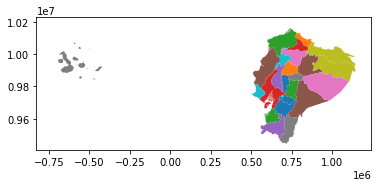

In [23]:
provincias_gdf.plot(column="DPA_PROVIN")

In [16]:
dfMasDatos = pd.read_csv("../data/datasetConMasDatos.csv")
dfMasDatos

,Unnamed: 0,ocid,id,initiationType,language,date,tag,title,description,status,...,id_supplier,name,id_contracts,status_contracts,id_awards,amount,currency,budget_id,ruc,Provincia
0,0,ocds-5wno2w-MCBS-DNA-003-2021-178618,MCBS-DNA-003-2021-178618-2022-05-04T11:41:39.8...,tender,es,2022-05-04T06:51:47-05:00,"[""planning"",""tender"",""award"",""contract""]",MCBS-DNA-003-2021-178618,SERVICIO DE MANTENIMIENTO PREVENTIVO Y CORRECT...,complete,...,EC-RUC-1801768969001-886562,SANTAMARIA MARFETAN JORGE VICENTE,2115897-MCBS-DNA-003-2021,terminated,4726509-MCBS-DNA-003-2021,24706.08,USD,2021.052.0003.0000.01.00.000.001.000.1701.5304...,1768040760001,Pichincha
1,1,ocds-5wno2w-LCC-GADMQ-001-2021-2453,LCC-GADMQ-001-2021-2453-2022-05-05T11:49:59.83...,tender,es,2022-05-05T06:56:50-05:00,"[""planning"",""tender"",""award"",""contract""]",LCC-GADMQ-001-2021-2453,FISCALIZACION DE LA CONSTRUCCION DEL PUENTE CA...,complete,...,EC-RUC-0992931647001-816329,MARTINIEV S.A,2092647-LCC-GADMQ-001-2021,terminated,5031904-LCC-GADMQ-001-2021,258933.74,USD,310750105A0000000000021,1260000650001,Los Rios
2,2,ocds-5wno2w-CDC-GADMP-2021-008-45119,CDC-GADMP-2021-008-45119-2022-05-07T11:59:26.4...,tender,es,2022-05-07T07:11:03-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",CDC-GADMP-2021-008-45119,"CONSULTORÍA PARA EL DIAGNÓSTICO, EVALUACIÓN DE...",complete,...,EC-RUC-1311371296001-334723,GARCIA PALMA CARLOS EDUARDO,2094051-CDC-GADMP-2021-008,terminated,5101416-CDC-GADMP-2021-008,2694.00,USD,3.2.0.7.3.06.01.33,560000460001,Cotopaxi
3,3,ocds-5wno2w-REGES-MPORTO-2021-13-2332,REGES-MPORTO-2021-13-2332-2022-05-07T11:56:24....,tender,es,2022-05-07T07:11:05-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",REGES-MPORTO-2021-13-2332,ESPACIOS DE DIFUSIÓN MASIVA A TRAVÉS DE VALLAS...,complete,...,EC-RUC-1310099567001-348867,INTRIAGO MACIAS MARTHA ROSALIA,2073500-REGES-MPORTO-2021-13,terminated,4748528-REGES-MPORTO-2021-13,13392.86,USD,2021.19.01.A100.150.530207.000.13.01.000.0.000,1360000200001,Manabi
4,4,ocds-5wno2w-RE-EEASA-142-2021-3233,RE-EEASA-142-2021-3233-2022-05-10T11:35:00.178...,tender,es,2022-05-10T06:46:51-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",RE-EEASA-142-2021-3233,?SERVICIO DE PAUTAJE EN EL MEDIO DE COMUNICACI...,complete,...,EC-RUC-1891801447001-1015485,INNFOPRESS S.A.S.,2090289-RE-EEASA-142-2021,terminated,5104157-RE-EEASA-142-2021,7000.00,USD,52202030102120128,1890001439001,Tungurahua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155426,155426,ocds-5wno2w-REOALC-GADMANTA01-21-2668,REOALC-GADMANTA01-21-2668-2022-04-30T12:21:31....,tender,es,2022-04-30T07:28:18-05:00,"[""planning"",""tender"",""award"",""contract""]",REOALC-GADMANTA01-21-2668,"CONTRATACIÓN DEL SERVICIO DE ORGANIZACIÓN, PRO...",complete,...,EC-RUC-1313812156001-1040458,YEROVI LOPEZ ROSSYENI MONSERRAT,2115646-REOALC-GADMANTA01-21,terminated,5151471-REOALC-GADMANTA01-21,268000.00,USD,530205,1360000980001,Manabi
155427,155427,ocds-5wno2w-MCBS-DNA-005-2021-178618,MCBS-DNA-005-2021-178618-2022-05-04T11:43:12.1...,tender,es,2022-05-04T06:51:47-05:00,"[""planning"",""tender"",""award"",""contract""]",MCBS-DNA-005-2021-178618,SERVICIO DE MANTENIMIENTO PREVENTIVO Y CORRECT...,complete,...,EC-RUC-0104042445001-559281,NARVAEZ BAHAMONDE JORGE ENRIQUE,2115899-MCBS-DNA-005-2021,terminated,4862272-MCBS-DNA-005-2021,28823.77,USD,2021.052.0003.0000.01.00.000.001.000.1701.5304...,1768040760001,Pichincha
155428,155428,ocds-5wno2w-MCS-CCFFAA-002-ABR21-2539,MCS-CCFFAA-002-ABR21-2539-2022-05-04T11:36:54....,tender,es,2022-05-04T06:51:48-05:00,"[""planning"",""tender"",""award"",""contract"",""imple...",MCS-CCFFAA-002-ABR21-2539,CONTRATACIÓN DE UNA AGENCIA DE VIAJES PARA LA ...,complete,...,EC-RUC-1792370027001-408010,SUMAKTOUR TRAVEL & TOURS CIA. LTDA.,2072552-MCS-CCFFAA-002-ABR21,terminated,4744578-MCS-CCFFAA-002-ABR21,7589.29,USD,2021.070.4999.0000.01.00.000.001.000.1701.5303...,1768012630001,Pichincha
15

In [17]:
dfMasDatos['date'] = dfMasDatos['date'].astype("datetime64[ns]")

In [18]:
dfMasDatos['Mes'] = dfMasDatos['date'].dt.month

In [21]:
dfMetodosProvinciasMeses= dfMasDatos.groupby(['Provincia','procurementMethod']).size().unstack(level=1).sort_values(by='Provincia')
dfMetodosProvinciasMeses = dfMetodosProvinciasMeses.fillna(0)
dfMetodosProvinciasMeses

procurementMethod,direct,limited,open,selective
Provincia,,,,
Azuay,712.0,39.0,160.0,500.0
Bolivar,70.0,1.0,78.0,2038.0
Carchi,116.0,7.0,12.0,32.0
Cañar,200.0,19.0,51.0,41.0
Chimborazo,282.0,6.0,93.0,20.0
Cotopaxi,176.0,8.0,65.0,136.0
El Oro,424.0,21.0,427.0,61.0
Esmeraldas,124.0,14.0,24.0,398.0
Galapagos,29.0,0.0,71929.0,14.0


In [22]:
df2 = dfMetodosProvinciasMeses.sum(axis=1)
df2

Provincia
Azuay                              1411.0
Bolivar                            2187.0
Carchi                              167.0
Cañar                               311.0
Chimborazo                          401.0
Cotopaxi                            385.0
El Oro                              933.0
Esmeraldas                          560.0
Galapagos                         71972.0
Guayas                            16042.0
Imbabura                           7620.0
Loja                                617.0
Los Rios                            395.0
Manabi                            38311.0
Morona Santiago                     613.0
Napo                               1585.0
Orellana                            109.0
Pastaza                             333.0
Pichincha                          9385.0
Santa Elena                          40.0
Santo Domingo de los Tsachilas      378.0
Sucumbios                           167.0
Tungurahua                         1113.0
Zamora Chinchipe        

In [31]:
provincias_gdf=provincias_gdf.sort_values(by='DPA_DESPRO')

In [36]:
totales=dfMetodosProvinciasMeses.sum(axis=1).tolist()

In [37]:
totales.append(0)
totales

[1411.0,
 2187.0,
 167.0,
 311.0,
 401.0,
 385.0,
 933.0,
 560.0,
 71972.0,
 16042.0,
 7620.0,
 617.0,
 395.0,
 38311.0,
 613.0,
 1585.0,
 109.0,
 333.0,
 9385.0,
 40.0,
 378.0,
 167.0,
 1113.0,
 396.0,
 0]

In [38]:
provincias_gdf["total"]=totales

In [50]:
provincias_gdf=provincias_gdf.drop(24)
provincias_gdf

,OBJECTID,DPA_PROVIN,DPA_DESPRO,DPA_VALOR,DPA_ANIO,REI_CODIGO,REN_CODIGO,PEE_CODIGO,Shape_Leng,Shape_Area,geometry,total
0,1.0,01,AZUAY,0,2010,05,01,593,6.796516e+05,8.325642e+09,"MULTIPOLYGON (((678190.956 9723881.975, 678231...",1411.0
1,2.0,02,BOLIVAR,0,2010,02,01,593,4.530732e+05,3.944871e+09,"MULTIPOLYGON (((710807.591 9872762.982, 710853...",2187.0
3,4.0,04,CARCHI,0,2010,04,01,593,4.739416e+05,3.779952e+09,"MULTIPOLYGON (((779010.257 10132276.997, 77891...",167.0
2,3.0,03,CAÑAR,0,2010,05,01,593,4.020828e+05,3.146684e+09,"MULTIPOLYGON (((708800.896 9751517.241, 708863...",311.0
5,6.0,06,CHIMBORAZO,0,2010,02,01,593,5.207470e+05,6.500470e+09,"MULTIPOLYGON (((748035.659 9841751.303, 748092...",401.0
4,5.0,05,COTOPAXI,0,2010,02,01,593,4.433564e+05,6.109122e+09,"MULTIPOLYGON (((730087.931 9962764.026, 730126...",385.0
6,7.0,07,EL ORO,0,2010,03,02,593,9.832850e+05,5.743354e+09,"MULTIPOLYGON (((588147.383 9619864.070, 588032...",933.0
7,8.0,08,ESMERALDAS,0,2010,04,02,593,1.784550e+06,1.607734e+10,"MULTIPOLYGON (((621920.854 10030817.553, 62192...",560.0
8,9.0,09,GUAYAS,0,2010,03,02,593,3.646697e+06,1.533582e+10,"MULTIPOLYGON (((592899.868 9666806.067, 592821...",16042.0
9,10.0,10,IMBABURA,0,2010,04,01,593,4.904138e+05,4.583470e+09,"MULTIPOLYGON (((804904.582 10084302.549, 80494...",7620.0


<AxesSubplot:>

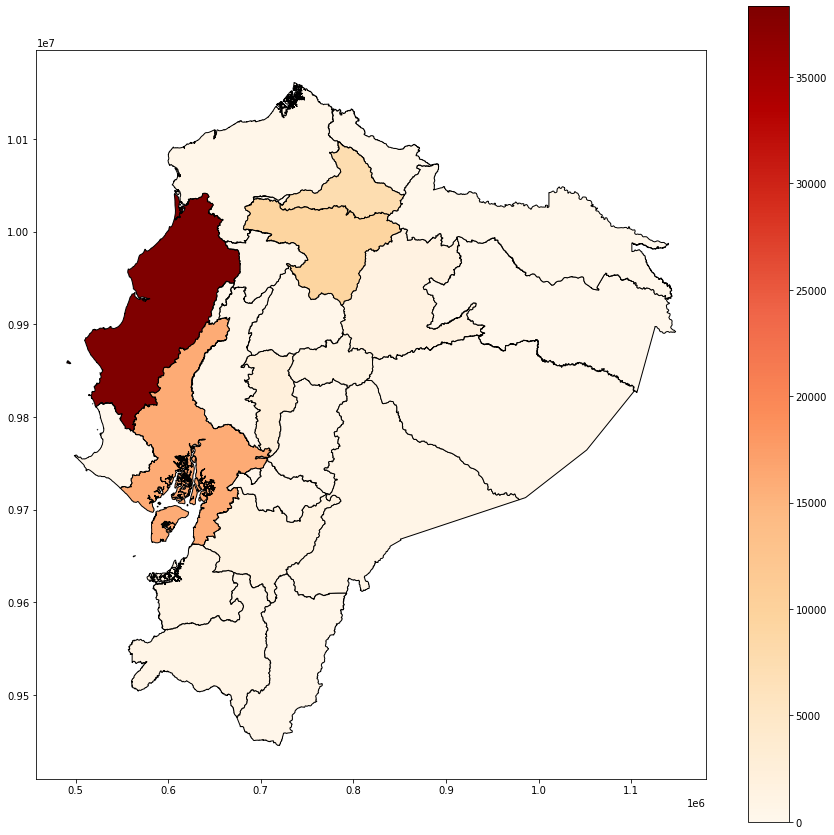

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
provincias_gdf.plot(ax=ax,column="total",cmap='OrRd', edgecolor='k', legend=True)

In [68]:
res = dfMetodosProvinciasMeses.div(dfMetodosProvinciasMeses.sum(axis=1), axis=0)
res = res.drop('Galapagos')
res.loc[res.shape[0]] = [0,0,0,0]
res

procurementMethod,direct,limited,open,selective
Provincia,,,,
Azuay,0.504607,0.027640,0.113395,0.354359
Bolivar,0.032007,0.000457,0.035665,0.931870
Carchi,0.694611,0.041916,0.071856,0.191617
Cañar,0.643087,0.061093,0.163987,0.131833
Chimborazo,0.703242,0.014963,0.231920,0.049875
Cotopaxi,0.457143,0.020779,0.168831,0.353247
El Oro,0.454448,0.022508,0.457663,0.065380
Esmeraldas,0.221429,0.025000,0.042857,0.710714
Guayas,0.080663,0.010909,0.023438,0.884989


In [70]:
res.dtypes

procurementMethod
direct       float64
limited      float64
open         float64
selective    float64
dtype: object

In [89]:
column_names = ['direct', 'limited', 'selective']
provincias_gdf['not_open']= res[column_names].sum(axis=1).values

In [64]:
prueba2= dfMasDatos.groupby(['procurementMethod']).size().sort_values()
prueba2

procurementMethod
limited        702
direct        8552
selective    68209
open         77968
dtype: int64

<AxesSubplot:title={'center':'TIPOS DE CONTRATACIONES'}, ylabel='procurementMethod'>

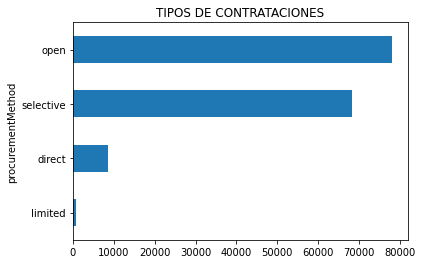

In [67]:
prueba2.plot(kind='barh', title='TIPOS DE CONTRATACIONES')

In [75]:
provincias_gdf['direct'] = res['direct'].values
provincias_gdf

,OBJECTID,DPA_PROVIN,DPA_DESPRO,DPA_VALOR,DPA_ANIO,REI_CODIGO,REN_CODIGO,PEE_CODIGO,Shape_Leng,Shape_Area,geometry,total,direct
0,1.0,01,AZUAY,0,2010,05,01,593,6.796516e+05,8.325642e+09,"MULTIPOLYGON (((678190.956 9723881.975, 678231...",1411.0,0.504607
1,2.0,02,BOLIVAR,0,2010,02,01,593,4.530732e+05,3.944871e+09,"MULTIPOLYGON (((710807.591 9872762.982, 710853...",2187.0,0.032007
3,4.0,04,CARCHI,0,2010,04,01,593,4.739416e+05,3.779952e+09,"MULTIPOLYGON (((779010.257 10132276.997, 77891...",167.0,0.694611
2,3.0,03,CAÑAR,0,2010,05,01,593,4.020828e+05,3.146684e+09,"MULTIPOLYGON (((708800.896 9751517.241, 708863...",311.0,0.643087
5,6.0,06,CHIMBORAZO,0,2010,02,01,593,5.207470e+05,6.500470e+09,"MULTIPOLYGON (((748035.659 9841751.303, 748092...",401.0,0.703242
4,5.0,05,COTOPAXI,0,2010,02,01,593,4.433564e+05,6.109122e+09,"MULTIPOLYGON (((730087.931 9962764.026, 730126...",385.0,0.457143
6,7.0,07,EL ORO,0,2010,03,02,593,9.832850e+05,5.743354e+09,"MULTIPOLYGON (((588147.383 9619864.070, 588032...",933.0,0.454448
7,8.0,08,ESMERALDAS,0,2010,04,02,593,1.784550e+06,1.607734e+10,"MULTIPOLYGON (((621920.854 10030817.553, 62192...",560.0,0.221429
8,9.0,09,GUAYAS,0,2010,03,02,593,3.646697e+06,1.533582e+10,"MULTIPOLYGON (((592899.868 9666806.067, 592821...",16042.0,0.080663
9,10.0,10,IMBABURA,0,2010,04,01,593,4.904138e+05,4.583470e+09,"MULTIPOLYGON (((804904.582 10084302.549, 80494...",7620.0,0.041207


In [76]:
provincias_gdf['limited'] = res['limited'].values
provincias_gdf['open'] = res['open'].values
provincias_gdf['selective'] = res['selective'].values
provincias_gdf

,OBJECTID,DPA_PROVIN,DPA_DESPRO,DPA_VALOR,DPA_ANIO,REI_CODIGO,REN_CODIGO,PEE_CODIGO,Shape_Leng,Shape_Area,geometry,total,direct,limited,open,selective
0,1.0,01,AZUAY,0,2010,05,01,593,6.796516e+05,8.325642e+09,"MULTIPOLYGON (((678190.956 9723881.975, 678231...",1411.0,0.504607,0.027640,0.113395,0.354359
1,2.0,02,BOLIVAR,0,2010,02,01,593,4.530732e+05,3.944871e+09,"MULTIPOLYGON (((710807.591 9872762.982, 710853...",2187.0,0.032007,0.000457,0.035665,0.931870
3,4.0,04,CARCHI,0,2010,04,01,593,4.739416e+05,3.779952e+09,"MULTIPOLYGON (((779010.257 10132276.997, 77891...",167.0,0.694611,0.041916,0.071856,0.191617
2,3.0,03,CAÑAR,0,2010,05,01,593,4.020828e+05,3.146684e+09,"MULTIPOLYGON (((708800.896 9751517.241, 708863...",311.0,0.643087,0.061093,0.163987,0.131833
5,6.0,06,CHIMBORAZO,0,2010,02,01,593,5.207470e+05,6.500470e+09,"MULTIPOLYGON (((748035.659 9841751.303, 748092...",401.0,0.703242,0.014963,0.231920,0.049875
4,5.0,05,COTOPAXI,0,2010,02,01,593,4.433564e+05,6.109122e+09,"MULTIPOLYGON (((730087.931 9962764.026, 730126...",385.0,0.457143,0.020779,0.168831,0.353247
6,7.0,07,EL ORO,0,2010,03,02,593,9.832850e+05,5.743354e+09,"MULTIPOLYGON (((588147.383 9619864.070, 588032...",933.0,0.454448,0.022508,0.457663,0.065380
7,8.0,08,ESMERALDAS,0,2010,04,02,593,1.784550e+06,1.607734e+10,"MULTIPOLYGON (((621920.854 10030817.553, 62192...",560.0,0.221429,0.025000,0.042857,0.710714
8,9.0,09,GUAYAS,0,2010,03,02,593,3.646697e+06,1.533582e+10,"MULTIPOLYGON (((592899.868 9666806.067, 592821...",16042.0,0.080663,0.010909,0.023438,0.884989
9,10.0,10,IMBABURA,0,2010,04,01,593,4.904138e+05,4.583470e+09,"MULTIPOLYGON (((804904.582 10084302.549, 80494...",7620.0,0.041207,0.002231,0.008399,0.948163


<AxesSubplot:>

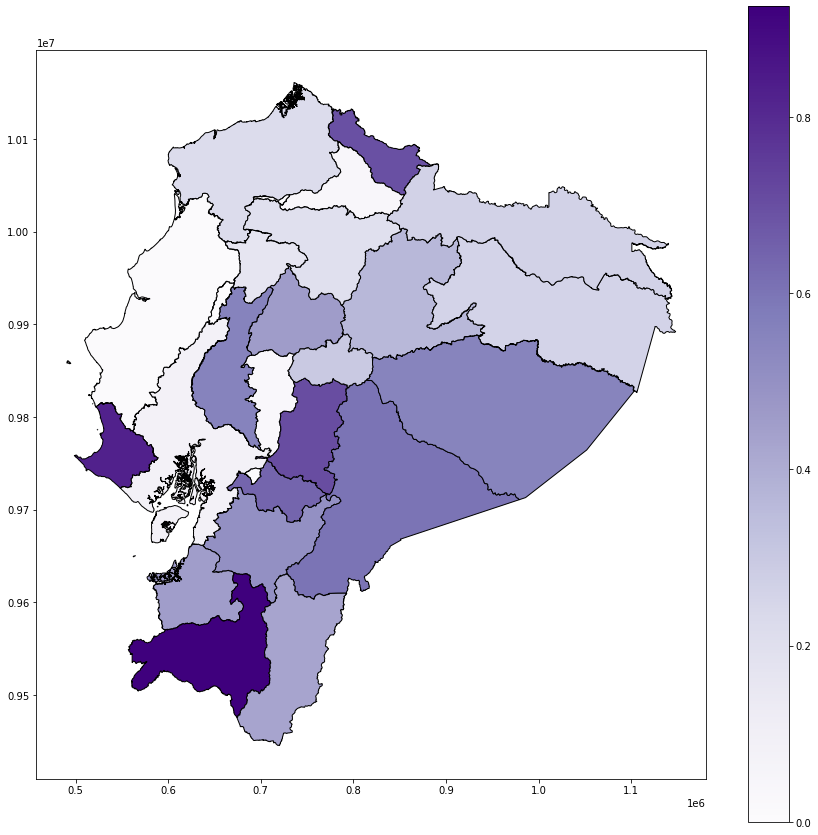

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
provincias_gdf.plot(ax=ax,column="direct",cmap='Purples', edgecolor='k', legend=True)

<AxesSubplot:>

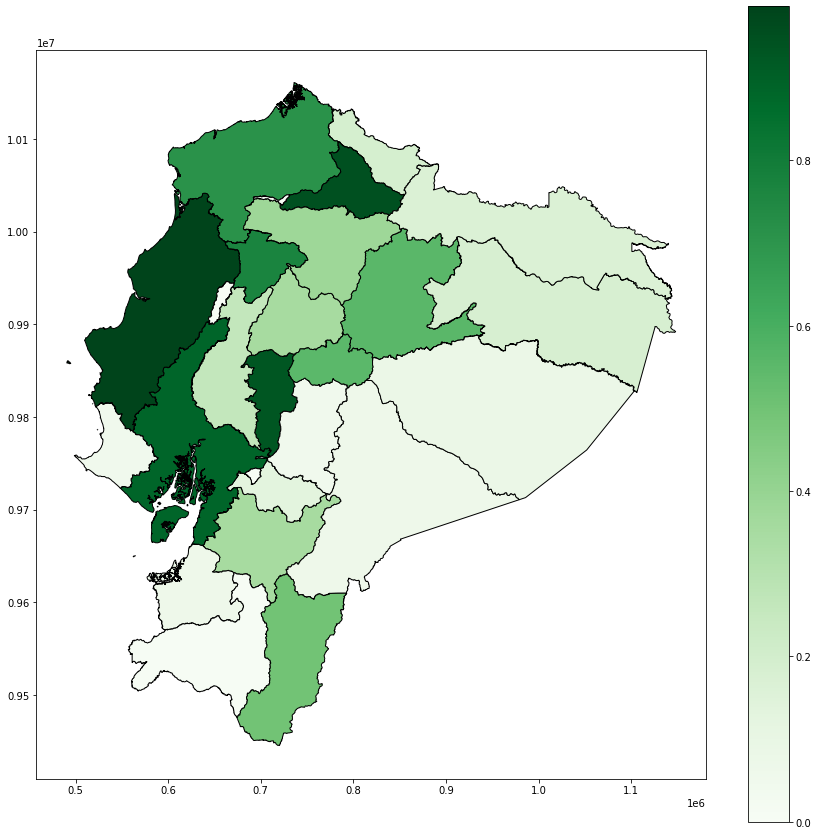

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
provincias_gdf.plot(ax=ax,column="selective",cmap='Greens', edgecolor='k', legend=True)

<AxesSubplot:>

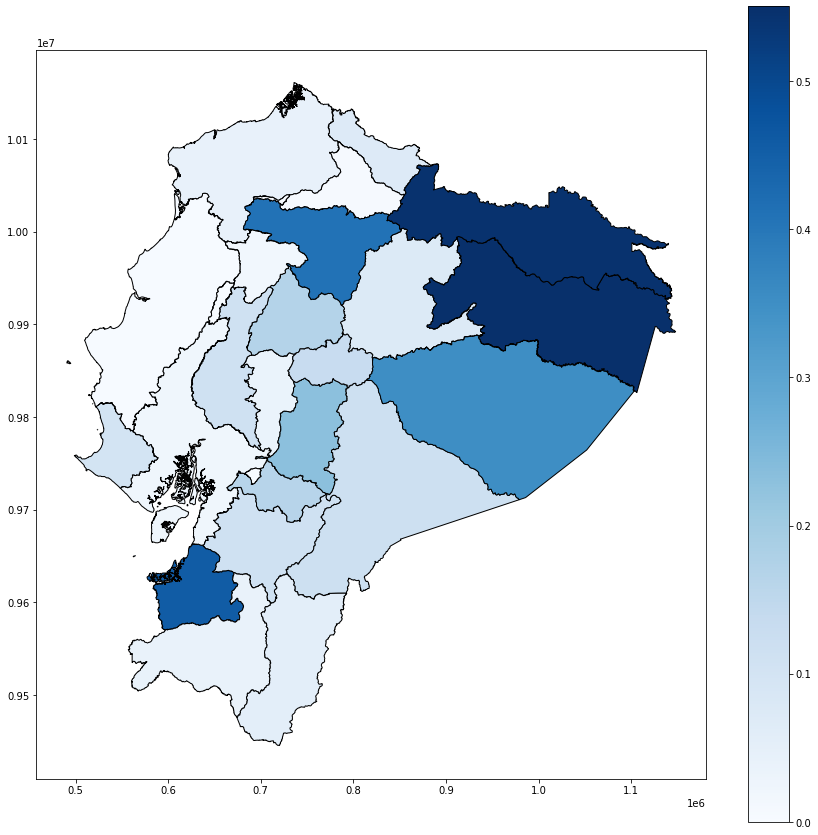

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
provincias_gdf.plot(ax=ax,column="open",cmap='Blues', edgecolor='k', legend=True)

<AxesSubplot:>

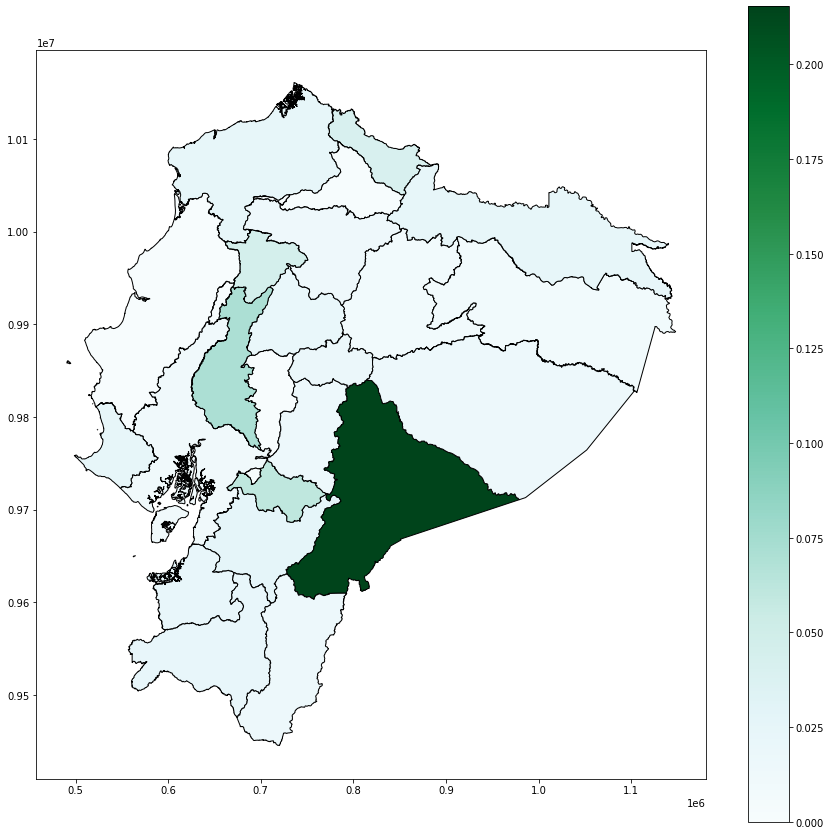

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
provincias_gdf.plot(ax=ax,column="limited",cmap='BuGn', edgecolor='k', legend=True)

In [90]:
provincias_gdf

,OBJECTID,DPA_PROVIN,DPA_DESPRO,DPA_VALOR,DPA_ANIO,REI_CODIGO,REN_CODIGO,PEE_CODIGO,Shape_Leng,Shape_Area,geometry,total,direct,limited,open,selective,not_open
0,1.0,01,AZUAY,0,2010,05,01,593,6.796516e+05,8.325642e+09,"MULTIPOLYGON (((678190.956 9723881.975, 678231...",1411.0,0.504607,0.027640,0.113395,0.354359,0.886605
1,2.0,02,BOLIVAR,0,2010,02,01,593,4.530732e+05,3.944871e+09,"MULTIPOLYGON (((710807.591 9872762.982, 710853...",2187.0,0.032007,0.000457,0.035665,0.931870,0.964335
3,4.0,04,CARCHI,0,2010,04,01,593,4.739416e+05,3.779952e+09,"MULTIPOLYGON (((779010.257 10132276.997, 77891...",167.0,0.694611,0.041916,0.071856,0.191617,0.928144
2,3.0,03,CAÑAR,0,2010,05,01,593,4.020828e+05,3.146684e+09,"MULTIPOLYGON (((708800.896 9751517.241, 708863...",311.0,0.643087,0.061093,0.163987,0.131833,0.836013
5,6.0,06,CHIMBORAZO,0,2010,02,01,593,5.207470e+05,6.500470e+09,"MULTIPOLYGON (((748035.659 9841751.303, 748092...",401.0,0.703242,0.014963,0.231920,0.049875,0.768080
4,5.0,05,COTOPAXI,0,2010,02,01,593,4.433564e+05,6.109122e+09,"MULTIPOLYGON (((730087.931 9962764.026, 730126...",385.0,0.457143,0.020779,0.168831,0.353247,0.831169
6,7.0,07,EL ORO,0,2010,03,02,593,9.832850e+05,5.743354e+09,"MULTIPOLYGON (((588147.383 9619864.070, 588032...",933.0,0.454448,0.022508,0.457663,0.065380,0.542337
7,8.0,08,ESMERALDAS,0,2010,04,02,593,1.784550e+06,1.607734e+10,"MULTIPOLYGON (((621920.854 10030817.553, 62192...",560.0,0.221429,0.025000,0.042857,0.710714,0.957143
8,9.0,09,GUAYAS,0,2010,03,02,593,3.646697e+06,1.533582e+10,"MULTIPOLYGON (((592899.868 9666806.067, 592821...",16042.0,0.080663,0.010909,0.023438,0.884989,0.976562
9,10.0,10,IMBABURA,0,2010,04,01,593,4.904138e+05,4.583470e+09,"MULTIPOLYGON (((804904.582 10084302.549, 80494...",7620.0,0.041207,0.002231,0.008399,0.948163,0.991601


<AxesSubplot:>

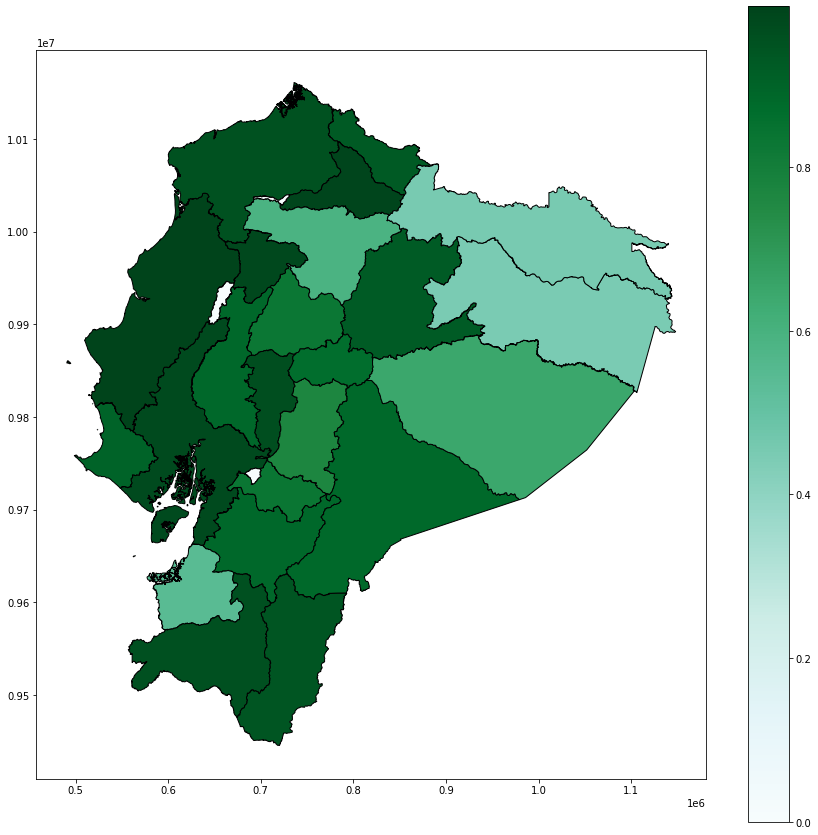

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
provincias_gdf.plot(ax=ax,column="not_open",cmap='BuGn', edgecolor='k', legend=True)